## TASK:3 EDA on Terrorism


### Author Abhishek katroliya
### Copyright by Abhishek katroliya 2020

In [1]:
# import all necessary libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('globalterrorismdb_0718dist.csv' , encoding='latin-1')
data.head()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State',
'attacktype1_txt':'Attacktype','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
terrorism = data[['Year','Month','Day','Country','Region','State','Attacktype','Target','Killed','Wounded','Summary','Group','city','latitude','longitude','Target_type','Weapon_type','Motive']]

In [45]:
terrorism.head()

,Year,Month,Day,Country,Region,State,Attacktype,Target,Killed,Wounded,Summary,Group,city,latitude,longitude,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Santo Domingo,18.456792,-69.951164,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Federal,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Mexico city,19.371887,-99.086624,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Assassination,Employee,1.0,0.0,NaN,Unknown,Unknown,15.478598,120.599741,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Attica,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Athens,37.997490,23.762728,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Fukouka,33.580412,130.396361,Government (Diplomatic),Incendiary,NaN


In [6]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   State        181270 non-null  object 
 6   Attacktype   181691 non-null  object 
 7   Target       181055 non-null  object 
 8   Killed       171378 non-null  float64
 9   Wounded      165380 non-null  float64
 10  Summary      115562 non-null  object 
 11  Group        181691 non-null  object 
 12  city         181257 non-null  object 
 13  latitude     177135 non-null  float64
 14  longitude    177134 non-null  float64
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [7]:
terrorism.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
State             421
Attacktype          0
Target            636
Killed          10313
Wounded         16311
Summary         66129
Group               0
city              434
latitude         4556
longitude        4557
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [8]:
print("Country with the most attack:", terrorism['Country'].value_counts().idxmax())
print("City with the most attack:", terrorism['city'].value_counts().index[1])
print("Region with the most attack:", terrorism['Region'].value_counts().idxmax())
print("State with the most attack:", terrorism['State'].value_counts().idxmax())
print("Year with the most attack:", terrorism['Year'].value_counts().idxmax())
print("Month with the most attack:", terrorism['Month'].value_counts().idxmax())
print("day with the most attack:", terrorism['Day'].value_counts().idxmax())
print("Attack type with the most attack:", terrorism['Attacktype'].value_counts().idxmax())
print("Weapon with the most attack:", terrorism['Weapon_type'].value_counts().idxmax())

Country with the most attack: Iraq
City with the most attack: Baghdad
Region with the most attack: Middle East & North Africa
State with the most attack: Baghdad
Year with the most attack: 2014
Month with the most attack: 5
day with the most attack: 15
Attack type with the most attack: Bombing/Explosion
Weapon with the most attack: Explosives


## Terrorism Activities by Region in each year

Text(0, 0.5, 'Number of attack')

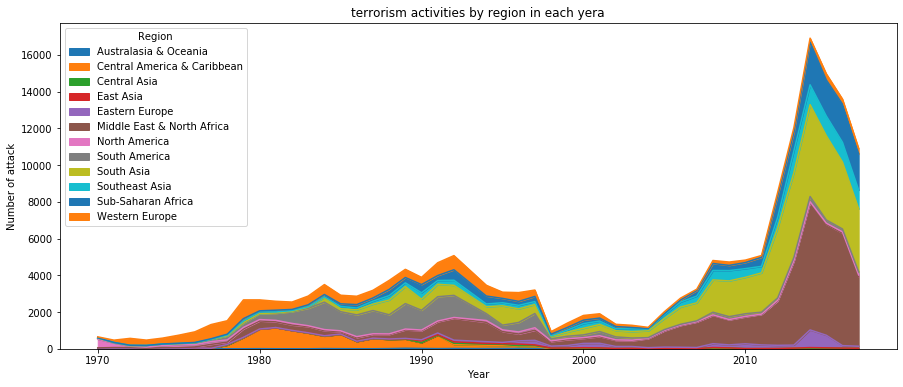

In [9]:
pd.crosstab(terrorism.Year,terrorism.Region).plot(kind='area',figsize=(15,6))
plt.title('terrorism activities by region in each yera')
plt.ylabel('Number of attack')


## Number of terrorism activities in each year

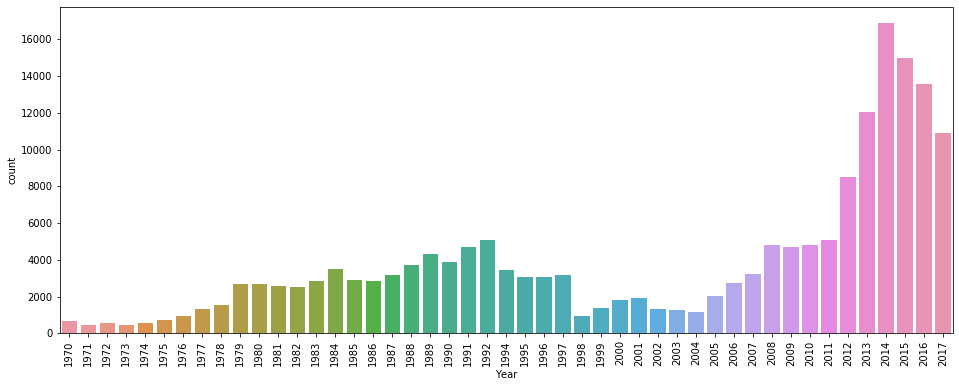

In [19]:
plt.subplots(figsize=(16,6))
sns.countplot('Year',data=terrorism)
plt.xticks(rotation=90)

plt.show()


## History of the Worth terror Attack in heatmap using Plotly

In [24]:
terrorism['Wounded']=terrorism['Wounded'].fillna(0).astype(int)
terrorism['Killed']=terrorism['Killed'].fillna(0).astype(int)
terrorism['casualities']=terrorism['Wounded'] + terrorism['Killed']




C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [25]:
terrorism.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
State             421
Attacktype          0
Target            636
Killed              0
Wounded             0
Summary         66129
Group               0
city              434
latitude         4556
longitude        4557
Target_type         0
Weapon_type         0
Motive         131130
Wouneded            0
casualities         0
dtype: int64

## value are stored by top 40 worth terror attack as to keep the headmap simple and easy visualize

In [26]:
terror_df1 = terrorism.sort_values(by='casualities',ascending=False)[:40]


In [28]:
heat=terror_df1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [39]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.to_numpy(), x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [41]:
terrorism.Country.value_counts()[:15]


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

## top Countries affected by Terror Attack

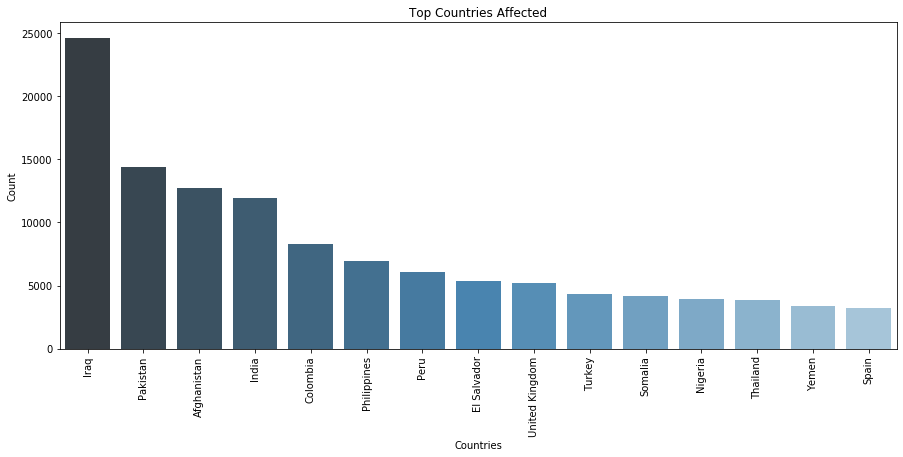

In [46]:
plt.subplots(figsize=(15,6))
sns.barplot(terrorism['Country'].value_counts()[:15].index,terrorism['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [50]:
terror_bubble_df = terrorism[(terrorism['Group'] != 'Unknown') & (terrorism['casualities'] > 50)]
terror_bubble_df.head()

,Year,Month,Day,Country,Region,State,Attacktype,Target,Killed,Wounded,Summary,Group,city,latitude,longitude,Target_type,Weapon_type,Motive,Wouneded,casualities
1200,1972,3,4,United Kingdom,Western Europe,Northern Ireland,Bombing/Explosion,"Janet Bereen, 21 and Anne Owens, 22, Catholics",2,130,NaN,Irish Republican Army (IRA),Belfast,54.607712,-5.956210,Business,Explosives,NaN,130,132
1314,1972,5,30,Israel,Middle East & North Africa,Central,Bombing/Explosion,Aircraft Terminal,26,72,NaN,Japanese Red Army (JRA),Lod,32.004361,34.888229,Airports & Aircraft,Firearms,NaN,72,98
1789,1973,3,8,United Kingdom,Western Europe,England,Bombing/Explosion,Court Building,1,238,NaN,Irish Republican Army (IRA),London,51.504387,-0.140041,Government (General),Explosives,NaN,238,239
1972,1973,8,5,Greece,Western Europe,Attica,Bombing/Explosion,TWA Lounge,5,55,NaN,Black September,Athens,37.997490,23.762728,Airports & Aircraft,Firearms,NaN,55,60
2138,1973,12,17,Italy,Western Europe,Lazio,Hostage Taking (Barricade Incident),Pan Am Lounge and Loading Pan Am 707,30,50,NaN,Black September,Rome,41.890961,12.490069,Airports & Aircraft,Firearms,NaN,50,80


In [51]:
terror_bubble_df = terror_bubble_df.sort_values(['Region', 'Country'])


In [52]:
terror_bubble_df.isnull().sum()


Year              0
Month             0
Day               0
Country           0
Region            0
State             3
Attacktype        0
Target            9
Killed            0
Wounded           0
Summary         517
Group             0
city              1
latitude         62
longitude        62
Target_type       0
Weapon_type       0
Motive         1059
Wouneded          0
casualities       0
dtype: int64

In [53]:
terror_bubble_df = terror_bubble_df.drop(['latitude','longitude','Summary','Motive','Target'],axis=1)


In [54]:
terror_bubble_df = terror_bubble_df.dropna(subset=['city'])


In [57]:
terror_bubble_df.isnull().sum()


Year           0
Month          0
Day            0
Country        0
Region         0
State          0
Attacktype     0
Killed         0
Wounded        0
Group          0
city           0
Target_type    0
Weapon_type    0
Wouneded       0
casualities    0
dtype: int64

In [56]:
terror_bubble_df = terror_bubble_df.dropna(subset=['State'])


In [58]:
terrorism.Group.value_counts()[1:15]


Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [60]:
terror_df_world = terrorism[['Country','casualities']]
terror_df_world = terror_df_world.groupby(['Country'])['casualities'].sum().sort_values(ascending=False) \
.reset_index()

In [61]:
terror_df_world.head()


,Country,casualities
0,Iraq,213279
1,Afghanistan,83661
2,Pakistan,65860
3,India,48321
4,Nigeria,32920
